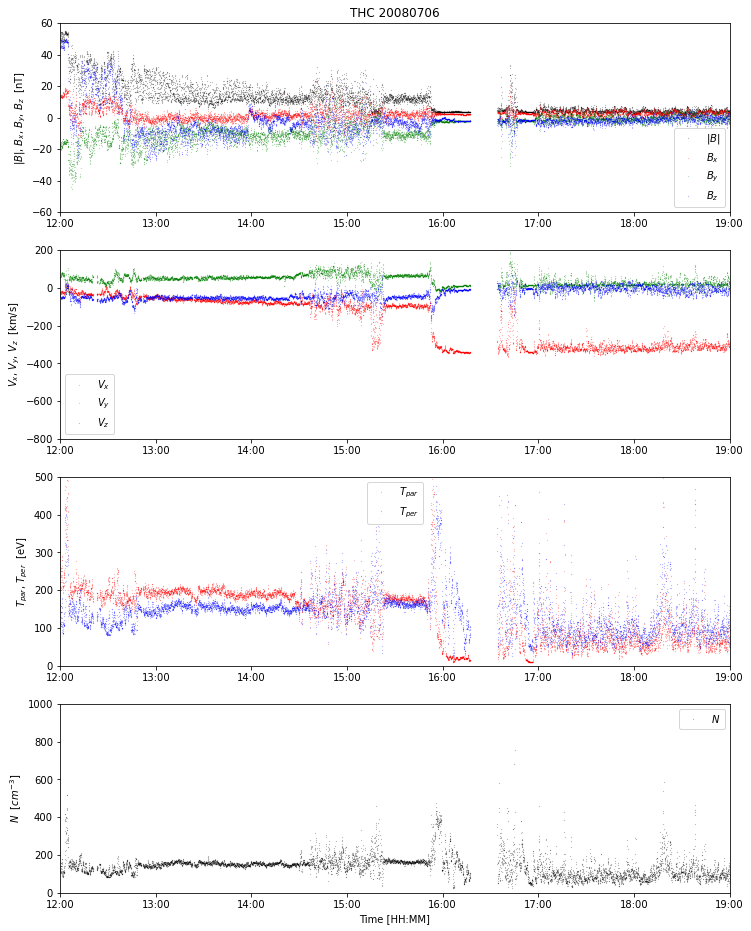

In [ ]:
#!/usr/bin/env python3
#
# fourier: It Fourier transforms the density before and after the bow-shock
#
# Developed by Dr. Gabor FACSKO (facsko.gabor@wigner.hu) in 2023
# Wigner Research Centre for Physics, Budapest, Hungary
# NASA Goddard Space Flight Center, Greenbelt, MD, USA
#
# -------------------------------------------------------------------------


import math 
import numpy as np
import calendar as cal
import matplotlib.dates as pdates
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from matplotlib.dates import (HOURLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

# Initialisation
workdir="/home/facskog/MyProjects/THEMIS/"
datafile="data_themisc-20080706.txt"
figurename=datafile[0:len(datafile)-4]

# Read data file 
filename=workdir+datafile
sourcefile = open(filename)
mylist = sourcefile.readlines()
# Remove the comment lines (header)
mylist_without_sharp = []
for e in mylist:
    if (not e.startswith('#')):
        mylist_without_sharp.append(e)
sourcefile.close()

# Array index
i=0
# Initialisation of time array
t = np.arange(datetime(2008,7,6,12,0,0), datetime(2008,7,6,19,59,58), timedelta(seconds=3)).astype(datetime)
# Cut the time array to the right length
t=t[0:len(mylist_without_sharp)]
# Initialisations of arrays
bmag=np.zeros(len(mylist_without_sharp))
bx=np.zeros(len(mylist_without_sharp))
by=np.zeros(len(mylist_without_sharp))
bz=np.zeros(len(mylist_without_sharp))
vmag=np.zeros(len(mylist_without_sharp))
vx=np.zeros(len(mylist_without_sharp))
vy=np.zeros(len(mylist_without_sharp))
vz=np.zeros(len(mylist_without_sharp))
tmag=np.zeros(len(mylist_without_sharp))
tpar=np.zeros(len(mylist_without_sharp))
tper=np.zeros(len(mylist_without_sharp))
n=np.zeros(len(mylist_without_sharp))

# Processing the file and prepare for analyzis --------------------------------------
for line in mylist_without_sharp:
    # The string is divided into fields
    split_line = line.split()
    # Process timestamp: the list is converted to string
    datestr=split_line[0]
    # Cut the timestamp only (3 digits were lost!!!)
    datestr=datestr[0:datestr.find('.')]
    # Convert string to datetime object
    datetime_object = datetime.strptime(datestr, '%Y-%m-%dT%H:%M:%S')
    t[i]=datetime_object
    
    # Magnetic field
    bstr=split_line[1]
    b=float(bstr)
    bmag[i]=b
    # Bx
    bstr=split_line[2]
    b=float(bstr)
    bx[i]=b
    # By
    bstr=split_line[3]
    b=float(bstr)
    by[i]=b
    # Bz
    bstr=split_line[4]
    b=float(bstr)
    bz[i]=b
    
    # Velocity
    vstr=split_line[5]
    v=float(vstr)
    vmag[i]=v
    # Vx
    vstr=split_line[6]
    v=float(vstr)
    vx[i]=v
    # Vy
    vstr=split_line[7]
    v=float(vstr)
    vy[i]=v
    # Vx
    vstr=split_line[8]
    v=float(vstr)
    vz[i]=v
    
    # Temperature
    tstr=split_line[9]
    tt=float(tstr)
    tmag[i]=tt
    # Tpar
    tstr=split_line[10]
    tt=float(tstr)
    tpar[i]=tt
    # Tper
    tstr=split_line[11]
    tt=float(tstr)
    tper[i]=tt
    
    # N
    nstr=split_line[12]
    nn=float(nstr)
    n[i]=tt
    
    i=i+1

# Plot
# Formate the plot (time axis)
rule = rrulewrapper(HOURLY)#, byeaster=1, interval=500)
loc = RRuleLocator(rule)
formatter = DateFormatter('%H:%M')
fig, ax = plt.subplots(4,figsize=(12,16)) # I have no clue what it is. I set here the size of the figure
# Set the date format
dates = pdates.date2num(t)
# Plot B data
ax[0].plot_date(dates,bmag,color='Black',markersize=0.1,label='$|B|$') # ,linestyle='-',linewidth=0.1
ax[0].plot_date(dates,bx,color='Red',markersize=0.1,label='$B_{x}$') # ,linestyle='-',linewidth=0.1
ax[0].plot_date(dates,by,color='Green',markersize=0.1,label='$B_{y}$') # ,linestyle='-',linewidth=0.1
ax[0].plot_date(dates,bz,color='Blue',markersize=0.1,label='$B_{z}$') # ,linestyle='-',linewidth=0.1
# Appropriate y axis
ax[0].set_ylim([-60,60]);
ax[0].set_title('THC 20080706')
#ax[0].set_xlabel('Time [HH:MM]')
ax[0].set_ylabel('$|B|$, $B_{x}$, $B_{y}$, $B_{z}$  [nT]')

# Appropriate x axis
min_hour=math.floor(t[0].hour+t[0].minute/60+t[0].second/3600)
min_datetime=datetime(t[0].year,t[0].month,t[0].day,min_hour,0,0)
max_hour=math.floor(t[len(mylist_without_sharp)-1].hour+
                    t[len(mylist_without_sharp)-1].minute/60
                    +t[len(mylist_without_sharp)-1].second/3600)
max_datetime=datetime(t[len(mylist_without_sharp)-1].year,
                      t[len(mylist_without_sharp)-1].month,
                      t[len(mylist_without_sharp)-1].day,max_hour,0,0)
# Set the time interval
ax[0].set_xlim([min_datetime,max_datetime]);
ax[0].xaxis.set_major_locator(loc)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[0].legend()

# Plot V data
#ax[1].plot_date(dates,vmag,color='Black',markersize=0.1,label='$|V|$') # ,linestyle='-',linewidth=0.1
ax[1].plot_date(dates,vx,color='Red',markersize=0.1,label='$V_{x}$') # ,linestyle='-',linewidth=0.1
ax[1].plot_date(dates,vy,color='Green',markersize=0.1,label='$V_{y}$') # ,linestyle='-',linewidth=0.1
ax[1].plot_date(dates,vz,color='Blue',markersize=0.1,label='$V_{z}$') # ,linestyle='-',linewidth=0.1
# Appropriate y axis
ax[1].set_ylim([-800,200]);
#ax[1].set_title('THC 20080706')
#ax[1].set_xlabel('Time [HH:MM]')
ax[1].set_ylabel('$V_{x}$, $V_{y}$, $V_{z}$  [km/s]') # $|V|$, 

# Set the time interval
ax[1].set_xlim([min_datetime,max_datetime]);
ax[1].xaxis.set_major_locator(loc)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[1].legend()

# Plot T data
#ax[2].plot_date(dates,ttmag,color='Black',markersize=0.1,label='$T$') # ,linestyle='-',linewidth=0.1
ax[2].plot_date(dates,tpar,color='Red',markersize=0.1,label='$T_{par}$') # ,linestyle='-',linewidth=0.1
ax[2].plot_date(dates,tper,color='Blue',markersize=0.1,label='$T_{per}$') # ,linestyle='-',linewidth=0.1
# Appropriate y axis
ax[2].set_ylim([0,500]);
#ax[2].set_title('THC 20080706')
#ax[2].set_xlabel('Time [HH:MM]')
ax[2].set_ylabel('$T_{par}$, $T_{per}$  [eV]') # $|T|$, 

# Set the time interval
ax[2].set_xlim([min_datetime,max_datetime]);
ax[2].xaxis.set_major_locator(loc)
ax[2].xaxis.set_major_formatter(formatter)
ax[2].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[2].legend()

# Plot N data
ax[3].plot_date(dates,tper,color='Black',markersize=0.1,label='$N$') # ,linestyle='-',linewidth=0.1
# Appropriate y axis
ax[3].set_ylim([0,1000]);
#ax[3].set_title('THC 20080706')
ax[3].set_xlabel('Time [HH:MM]')
ax[3].set_ylabel('$N$  [$cm^{-3}$]')

# Set the time interval
ax[3].set_xlim([min_datetime,max_datetime]);
ax[3].xaxis.set_major_locator(loc)
ax[3].xaxis.set_major_formatter(formatter)
ax[3].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[3].legend()


# Save figure
plt.savefig(workdir+figurename+'.jpg',transparent=False)
# Plot figure
plt.show()